# Limpieza de datos - Trabajo Practico

###  1.1 Importando los datos

In [17]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn

In [2]:
kickstarter_2018 = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])

In [3]:
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')

In [4]:
kickstarter_2018.sample(5)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
796196901,10G Christmas Tree,Art,Art,USD,2010-12-26,10526.00,2010-12-08 08:44:04,0.00,failed,0,US,0.00,0.00,10526.00
483825010,Gliff,Gaming Hardware,Games,USD,2016-03-28,10000.00,2016-01-28 04:56:18,51.00,failed,5,US,51.00,51.00,10000.00
123916947,STUFFED Food Truck,Food Trucks,Food,USD,2015-01-06,60000.00,2014-11-07 02:24:36,25.00,failed,1,US,25.00,25.00,60000.00
1565733636,NeoExodus Adventure: Origin of Man for Pathfin...,Tabletop Games,Games,USD,2012-05-01,500.00,2012-03-15 01:16:10,585.00,successful,17,US,585.00,585.00,500.00
1273544891,NAPOLEON IN NEW YORK! an original TV Series,Comedy,Film & Video,USD,2016-07-26,25000.00,2016-05-27 00:07:25,25.00,failed,1,US,25.00,25.00,25000.00


### 1.2. Resolucion de ejercicios

#### Ejercicio 1:
Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados.

In [10]:
# Primero vamos a ver si hay duplicados
pd.Series(dataset['name'],dtype=str).describe()
# Como se puede observar hay 378661 valores y solo 375765 son unicos

count                       378661
unique                      375765
top       New EP/Music Development
freq                            41
Name: name, dtype: object

In [13]:
# Obtenemos todos los valores (nombres) que se encuentran repetidos
repeated_names = kickstarter_2018[kickstarter_2018.name.duplicated(keep=False)]
# Los agrupamos por la columna 'name'
repeated_names = repeated_names.sort_values(by=['name'],ascending=True)

In [14]:
# Visualizamos los primeros 10 valores:
repeated_names[10:]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1413519345,"""Cut From the Illest Cloth"" - The Brand New Fu...",Hip-Hop,Music,USD,2014-03-26,9000.00,2014-03-01 19:32:15,1010.00,canceled,25,US,1010.00,1010.00,9000.00
1637334549,"""Cut From the Illest Cloth"" - The Brand New Fu...",Hip-Hop,Music,GBP,2014-03-04,14000.00,2014-02-02 16:00:57,225.00,canceled,7,GB,369.89,377.33,23478.12
1656736114,"""ONE""",Apps,Technology,USD,2016-02-25,10000.00,2016-01-26 17:37:04,0.00,failed,0,US,0.00,0.00,10000.00
159049492,"""ONE""",Classical Music,Music,USD,2016-09-26,10000.00,2016-08-12 03:19:12,10261.00,successful,113,US,1870.00,10261.00,10000.00
72198224,"""On The Road""",Tabletop Games,Games,USD,2014-01-01,20000.00,2013-12-02 22:19:48,612.00,failed,10,US,612.00,612.00,20000.00
996180421,"""On The Road""",Webseries,Film & Video,USD,2015-01-22,80000.00,2014-12-23 17:31:06,0.00,failed,0,US,0.00,0.00,80000.00
306461885,"""Pulse""- a new album from ""Blind Focus"" to sup...",Music,Music,CAD,2016-12-08,4000.00,2016-11-08 03:01:36,270.00,canceled,3,CA,44.77,204.90,3035.59
1023301684,"""Pulse""- a new album from ""Blind Focus"" to sup...",Music,Music,CAD,2016-12-17,4000.00,2016-11-17 09:45:59,0.00,canceled,0,CA,0.00,0.00,2959.89
516801004,"""Reflections""",Shorts,Film & Video,USD,2012-10-16,3000.00,2012-09-16 07:47:47,0.00,failed,0,US,0.00,0.00,3000.00


In [15]:
# Los duplicados estrictamente hablando es el siguiente subconjunto:
duplicated_names = repeated_names.groupby('name') 
duplicated_names = duplicated_names.filter(lambda x: 1 < x['name'].count() < 3)
duplicated_names[10:]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1413519345,"""Cut From the Illest Cloth"" - The Brand New Fu...",Hip-Hop,Music,USD,2014-03-26,9000.00,2014-03-01 19:32:15,1010.00,canceled,25,US,1010.00,1010.00,9000.00
1637334549,"""Cut From the Illest Cloth"" - The Brand New Fu...",Hip-Hop,Music,GBP,2014-03-04,14000.00,2014-02-02 16:00:57,225.00,canceled,7,GB,369.89,377.33,23478.12
1656736114,"""ONE""",Apps,Technology,USD,2016-02-25,10000.00,2016-01-26 17:37:04,0.00,failed,0,US,0.00,0.00,10000.00
159049492,"""ONE""",Classical Music,Music,USD,2016-09-26,10000.00,2016-08-12 03:19:12,10261.00,successful,113,US,1870.00,10261.00,10000.00
72198224,"""On The Road""",Tabletop Games,Games,USD,2014-01-01,20000.00,2013-12-02 22:19:48,612.00,failed,10,US,612.00,612.00,20000.00
996180421,"""On The Road""",Webseries,Film & Video,USD,2015-01-22,80000.00,2014-12-23 17:31:06,0.00,failed,0,US,0.00,0.00,80000.00
306461885,"""Pulse""- a new album from ""Blind Focus"" to sup...",Music,Music,CAD,2016-12-08,4000.00,2016-11-08 03:01:36,270.00,canceled,3,CA,44.77,204.90,3035.59
1023301684,"""Pulse""- a new album from ""Blind Focus"" to sup...",Music,Music,CAD,2016-12-17,4000.00,2016-11-17 09:45:59,0.00,canceled,0,CA,0.00,0.00,2959.89
516801004,"""Reflections""",Shorts,Film & Video,USD,2012-10-16,3000.00,2012-09-16 07:47:47,0.00,failed,0,US,0.00,0.00,3000.00


#### Ejercicio 2:
Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [28]:
from hashlib import md5

In [29]:
# Funcion que retorna los md5
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

In [36]:
# Se agrega columna con los md5 de los nombres
repeated_names['names_md5'] = repeated_names['name'].apply(hashit)

In [39]:
repeated_names['names_md5']

ID
816998285     0c7a251ffe4c7834cbc4b04906952ff1
815783250     0c7a251ffe4c7834cbc4b04906952ff1
1010584633    67554ab4203d95f2f2f05365f768206e
713417995     67554ab4203d95f2f2f05365f768206e
1880084695    19a82bc4c5961834282575d07d9b5f7c
422509694     19a82bc4c5961834282575d07d9b5f7c
866225086     b4ca2044f21f67e13ddb7583f59189a7
1760892298    b4ca2044f21f67e13ddb7583f59189a7
1999958521    bed6c6cbc0540c8d40b7e2311806cc5c
870322805     bed6c6cbc0540c8d40b7e2311806cc5c
1413519345    24873b2974fe8222256c6cc800a2b361
1637334549    24873b2974fe8222256c6cc800a2b361
1656736114    5f38010cf3ee47694a209c9a8403acfa
159049492     5f38010cf3ee47694a209c9a8403acfa
72198224      b2226ed5c4031a0c849ac470e9910f7d
996180421     b2226ed5c4031a0c849ac470e9910f7d
306461885     2587a1a381b7ff6d58e564532406b035
1023301684    2587a1a381b7ff6d58e564532406b035
516801004     0e9a80859587c8f75672828db5fb9118
2007967203    0e9a80859587c8f75672828db5fb9118
1223071711    2727d1da48d26f0f96b6e1d6e591c447
2136175444

In [40]:
# Calculamos los duplicados solo teniendo en cuenta la columna name
print(repeated_names[repeated_names['name'].duplicated(keep=False)].shape)

(5125, 16)


In [43]:
# Calculamos los duplicados teniendo en cuenta la columna name_md5
print(repeated_names[repeated_names['names_md5'].duplicated(keep=False)].shape)

(5125, 16)


Ambas consultas retornan la misma informacion. Adicionalmente revisamos los datos para un caso particular

In [44]:
repeated_names.loc[816998285]

name                "...The Last shall be first..." LODB Lifestyle...
category                                                      Fashion
main_category                                                 Fashion
currency                                                          USD
deadline                                          2014-02-09 00:00:00
goal                                                          6500.00
launched                                          2013-12-19 21:51:50
pledged                                                          0.00
state                                                        canceled
backers                                                             0
country                                                            US
usd pledged                                                      0.00
usd_pledged_real                                                 0.00
usd_goal_real                                                 6500.00
md5                 

In [45]:
repeated_names.loc[815783250]

name                "...The Last shall be first..." LODB Lifestyle...
category                                                      Fashion
main_category                                                 Fashion
currency                                                          USD
deadline                                          2014-03-01 00:00:00
goal                                                          6500.00
launched                                          2014-01-03 20:39:16
pledged                                                         37.00
state                                                          failed
backers                                                             3
country                                                            US
usd pledged                                                     37.00
usd_pledged_real                                                37.00
usd_goal_real                                                 6500.00
md5                 

#### Ejercicio 3
Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [23]:
# importamos la libreria
import ftfy.badness as bad

In [24]:
# Funcion que retorna los strings raros
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

In [25]:
# Observamos la cantidad de nombres con caracteres extraños para kickstarter_2018
kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
pd.Series(kickstarter_2018[kickstarter_2018['name_weirdness'] > 1]['name'],dtype=str).describe()

count                                         2
unique                                        2
top       theNewerYork III: Al?®mîng Lî†£®å†u®£
freq                                          1
Name: name, dtype: object

In [27]:
# Cargamos ahora datos con encoding iso-8859-1 el dataset ks-projects-201801.csv'.
ksprojects = pd.read_csv("../input/kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')

In [28]:
# Observamos como aumenta la cantidad de nombres raros para el dataset ks-projects-201801 con encode ISO-8859-1 
ksprojects['name_weirdness'] = ksprojects['name'].apply(weird)
pd.Series(ksprojects[ksprojects['name_weirdness'] > 1]['name'],dtype=str).describe()

count                                                  2934
unique                                                 2926
top       Tohoku Zunko Animation âZunda Horizonâ Pro...
freq                                                      2
Name: name, dtype: object

#### Ejercicio 4
Codificar currency con ambas estrategias

    Estrategia 1: asociar cadenas a numeros

In [48]:
from sklearn import preprocessing

In [49]:
column='currency'
# Create a label encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

LabelEncoder()

In [50]:
# View encoder mapping
dict(zip(le.classes_, le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [51]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,5,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,13,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,13,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,13,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,13,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00


In [52]:
# Reversing encoding
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00


    Estrategia 2: asociar cadena a columna

In [54]:
from sklearn.preprocessing import LabelBinarizer

In [55]:
other_column = 'currency'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[column])
pd.DataFrame(lb_results, columns=((column + '_') + pd.Series(lb.classes_))).head(14)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Se observa para la fila 0 se marca con '1' concurrency_GBP, para la fila 1 se tiene un '1' para la columna concurrency_USD, y asi sucesivamente para el resto de las filas que componen el dataset

In [62]:
kickstarter_2018.head(14)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.00,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.00,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.00,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.00,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00


#### Ejercicio 5
1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?

In [5]:
# Obtenemos los proyectos con estado 'successful' donde el dinero recaudado fue menor al objetivo:
kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1368992939,Santa's Sled,Art,Art,USD,2012-08-27,3600.00,2012-07-26 03:31:28,3599.69,successful,64,US,3599.69,3599.69,3600.00
1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,Film & Video,USD,2015-12-27,36000.00,2015-11-12 19:06:18,30716.00,successful,275,US,30716.00,30716.00,36000.00
251325270,Documentary film about Les Blank.,Documentary,Film & Video,USD,2010-07-18,8000.00,2010-06-02 22:15:38,7999.65,successful,73,US,7999.65,7999.65,8000.00
4732285,Insiders/Out: Exploring Outsider Art in America,Art,Art,USD,2010-07-08,2000.00,2010-05-27 00:26:33,1999.66,successful,30,US,1999.66,1999.66,2000.00
780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,Design,EUR,2016-03-19,25000.00,2016-02-08 19:14:02,24892.50,successful,90,DE,27778.24,27765.07,27884.98


In [6]:
# Si calculamos el porcentaje nos da el 0%, ya que apenas son 5 proyectos sobre el total de la muestra:
partial = kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]['name'].count()
total = kickstarter_2018[(kickstarter_2018.state == 'successful')]['name'].count()
per = (partial / total) * 100
per

0.0037325689032219533

2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [66]:
kickstarter_2018.groupby(['main_category', 'state']).size()

main_category  state     
Art            canceled       2222
               failed        14131
               live            194
               successful    11510
               suspended        96
Comics         canceled        842
               failed         4036
               live             76
               successful     5842
               suspended        23
Crafts         canceled        843
               failed         5703
               live             76
               successful     2115
               suspended        72
Dance          canceled        163
               failed         1235
               live             18
               successful     2338
               suspended        13
               undefined         1
Design         canceled       4152
               failed        14814
               live            305
               successful    10550
               suspended       247
               undefined         2
Fashion        canceled      

#### Ejercicio 6
Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

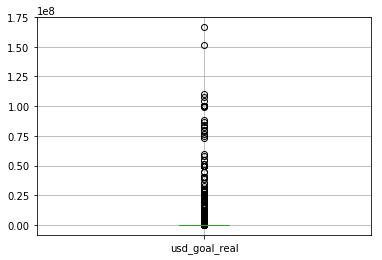

In [11]:
# Graficamos un boxplot para 'usd_goal_real'
kickstarter_2018.boxplot(column='usd_goal_real');

In [12]:
# Calculamos los valores extraños teniendo en cuenta una variacion de 3 respecto de la media:
outliers = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]
outliers

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1009207145,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.00,2014-06-21 22:34:21,285.00,failed,5,CA,263.41,264.67,3575408.62
1015466274,Genesis,Film & Video,Film & Video,EUR,2015-09-01,5000000.00,2015-07-07 21:14:52,0.00,failed,0,IT,0.00,0.00,5568982.99
1016210580,INDIRA – THE FIRST INDIAN GRAND MUSICAL,Musical,Theater,EUR,2016-04-27,15000000.00,2016-02-27 13:08:01,15.00,failed,6,ES,16.59,17.10,17104542.97
1025947904,Long island city new york art book (Canceled),Photography,Photography,USD,2013-11-07,10000000.00,2013-10-08 23:16:26,0.00,canceled,0,US,0.00,0.00,10000000.00
1029500715,Harambe World's Tallest Statue,Public Art,Art,USD,2016-11-25,20000000.00,2016-09-26 18:08:01,1.00,canceled,1,US,0.00,1.00,20000000.00
1031487313,Music app ( Pupilize) is the next big thing fo...,Music,Music,USD,2017-02-07,5000000.00,2017-01-08 06:49:52,0.00,failed,0,US,0.00,0.00,5000000.00
1046235166,Duel,Science Fiction,Film & Video,USD,2016-03-06,10000000.00,2016-01-06 15:00:11,100.00,failed,2,US,100.00,100.00,10000000.00
1052555922,Cloud Based Project Analytics Dashboards,Software,Technology,USD,2017-03-05,10000000.00,2017-03-04 01:25:03,25.00,failed,1,US,25.00,25.00,10000000.00
1062809925,Turn a Blind Eye,Narrative Film,Film & Video,GBP,2014-02-21,4000000.00,2013-12-23 22:36:10,0.00,failed,0,GB,0.00,0.00,6671447.87


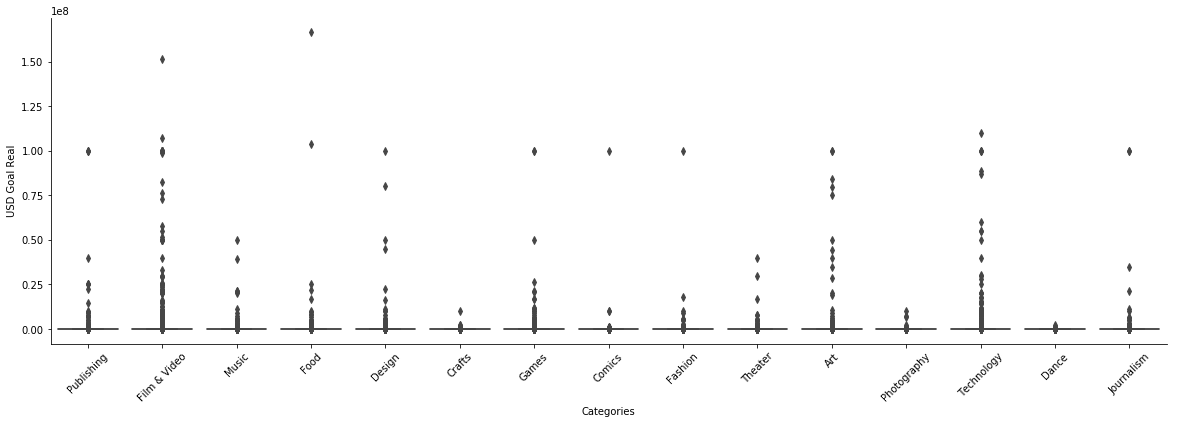

In [20]:
# Graficamos un boxplot para 'usd_goal_real' por categoria con los outliers:
plt.figure(figsize=(20,6))
seaborn.boxplot(data=kickstarter_2018,
                x='main_category', y='usd_goal_real')
plt.ylabel('USD Goal Real')
plt.xlabel('Categories')
plt.xticks(rotation=45)
seaborn.despine()

In [21]:
# La misma grafica, ahora quitando los valores extraños segun el calculo anterior:
kickstarter_2018_without_outliers = kickstarter_2018[kickstarter_2018.usd_goal_real < (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]

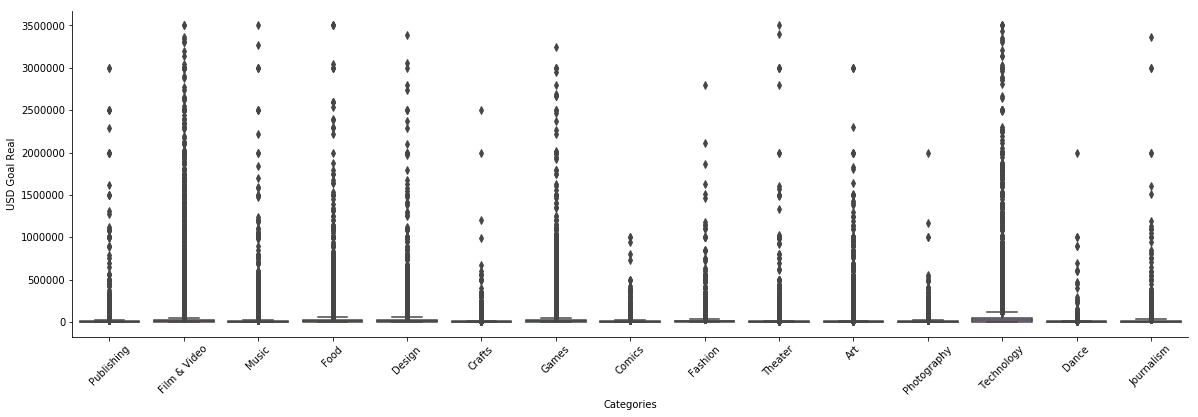

In [22]:
plt.figure(figsize=(20,6))
seaborn.boxplot(data=kickstarter_2018_without_outliers,
                x='main_category', y='usd_goal_real')
plt.ylabel('USD Goal Real')
plt.xlabel('Categories')
plt.xticks(rotation=45)
seaborn.despine()